In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# 현재경로 확인
os.getcwd()

'D:\\개인폴더\\온라인강의\\실습자료'

In [3]:
# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
5,58.7,394.12,6.430,0.02985,6.0622,2.18,5.21,0.458,18.7,3,0.0,222,0,28.7
6,66.6,395.60,6.012,0.08829,5.5605,7.87,12.43,0.524,15.2,5,12.5,311,0,22.9
7,96.1,396.90,6.172,0.14455,5.9505,7.87,19.15,0.524,15.2,5,12.5,311,0,27.1
8,100.0,386.63,5.631,0.21124,6.0821,7.87,29.93,0.524,15.2,5,12.5,311,0,16.5
9,85.9,386.71,6.004,0.17004,6.5921,7.87,17.10,0.524,15.2,5,12.5,311,0,18.9


In [4]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [5]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

## crim, rm, lstat을 통한 다중 선형 회귀분석

In [6]:
x_data=boston[['CRIM','RM','LSTAT']] ##변수 여러개
target = boston[['Target']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [7]:
x_data1 = sm.add_constant(x_data, has_constant='add')


In [8]:
multi_model = sm.OLS(target,x_data1)
fitted_multi_model=multi_model.fit()

In [10]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 23 Aug 2019   Prob (F-statistic):          1.01e-112
Time:                        13:27:31   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## crim, rm, lstat, b, tax, age, zn, nox, indus 변수를 통한 다중선형회귀분석 

In [11]:
x_data2=boston[['CRIM','RM','LSTAT','B','TAX','AGE','ZN','NOX','INDUS']]  ##변수 추가
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [12]:
x_data2_ = sm.add_constant(x_data2, has_constant='add')


In [13]:
multi_model2 = sm.OLS(target,x_data2_)
fitted_multi_model2=multi_model2.fit()

In [14]:
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 23 Aug 2019   Prob (F-statistic):          5.76e-111
Time:                        13:28:06   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [16]:
fitted_multi_model2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

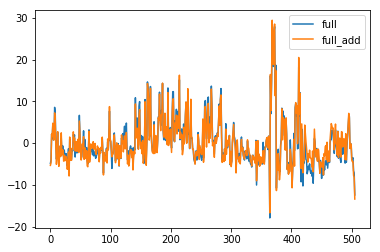

In [17]:
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label="full")
fitted_multi_model2.resid.plot(label="full_add")
plt.legend()

## 상관계수/산점도를 통해 다중공선성 확인

In [18]:
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


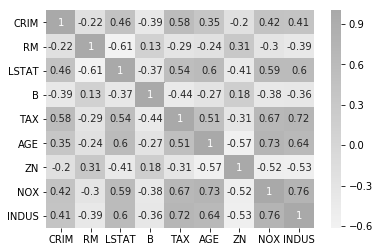

In [19]:
import seaborn as sns;
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()

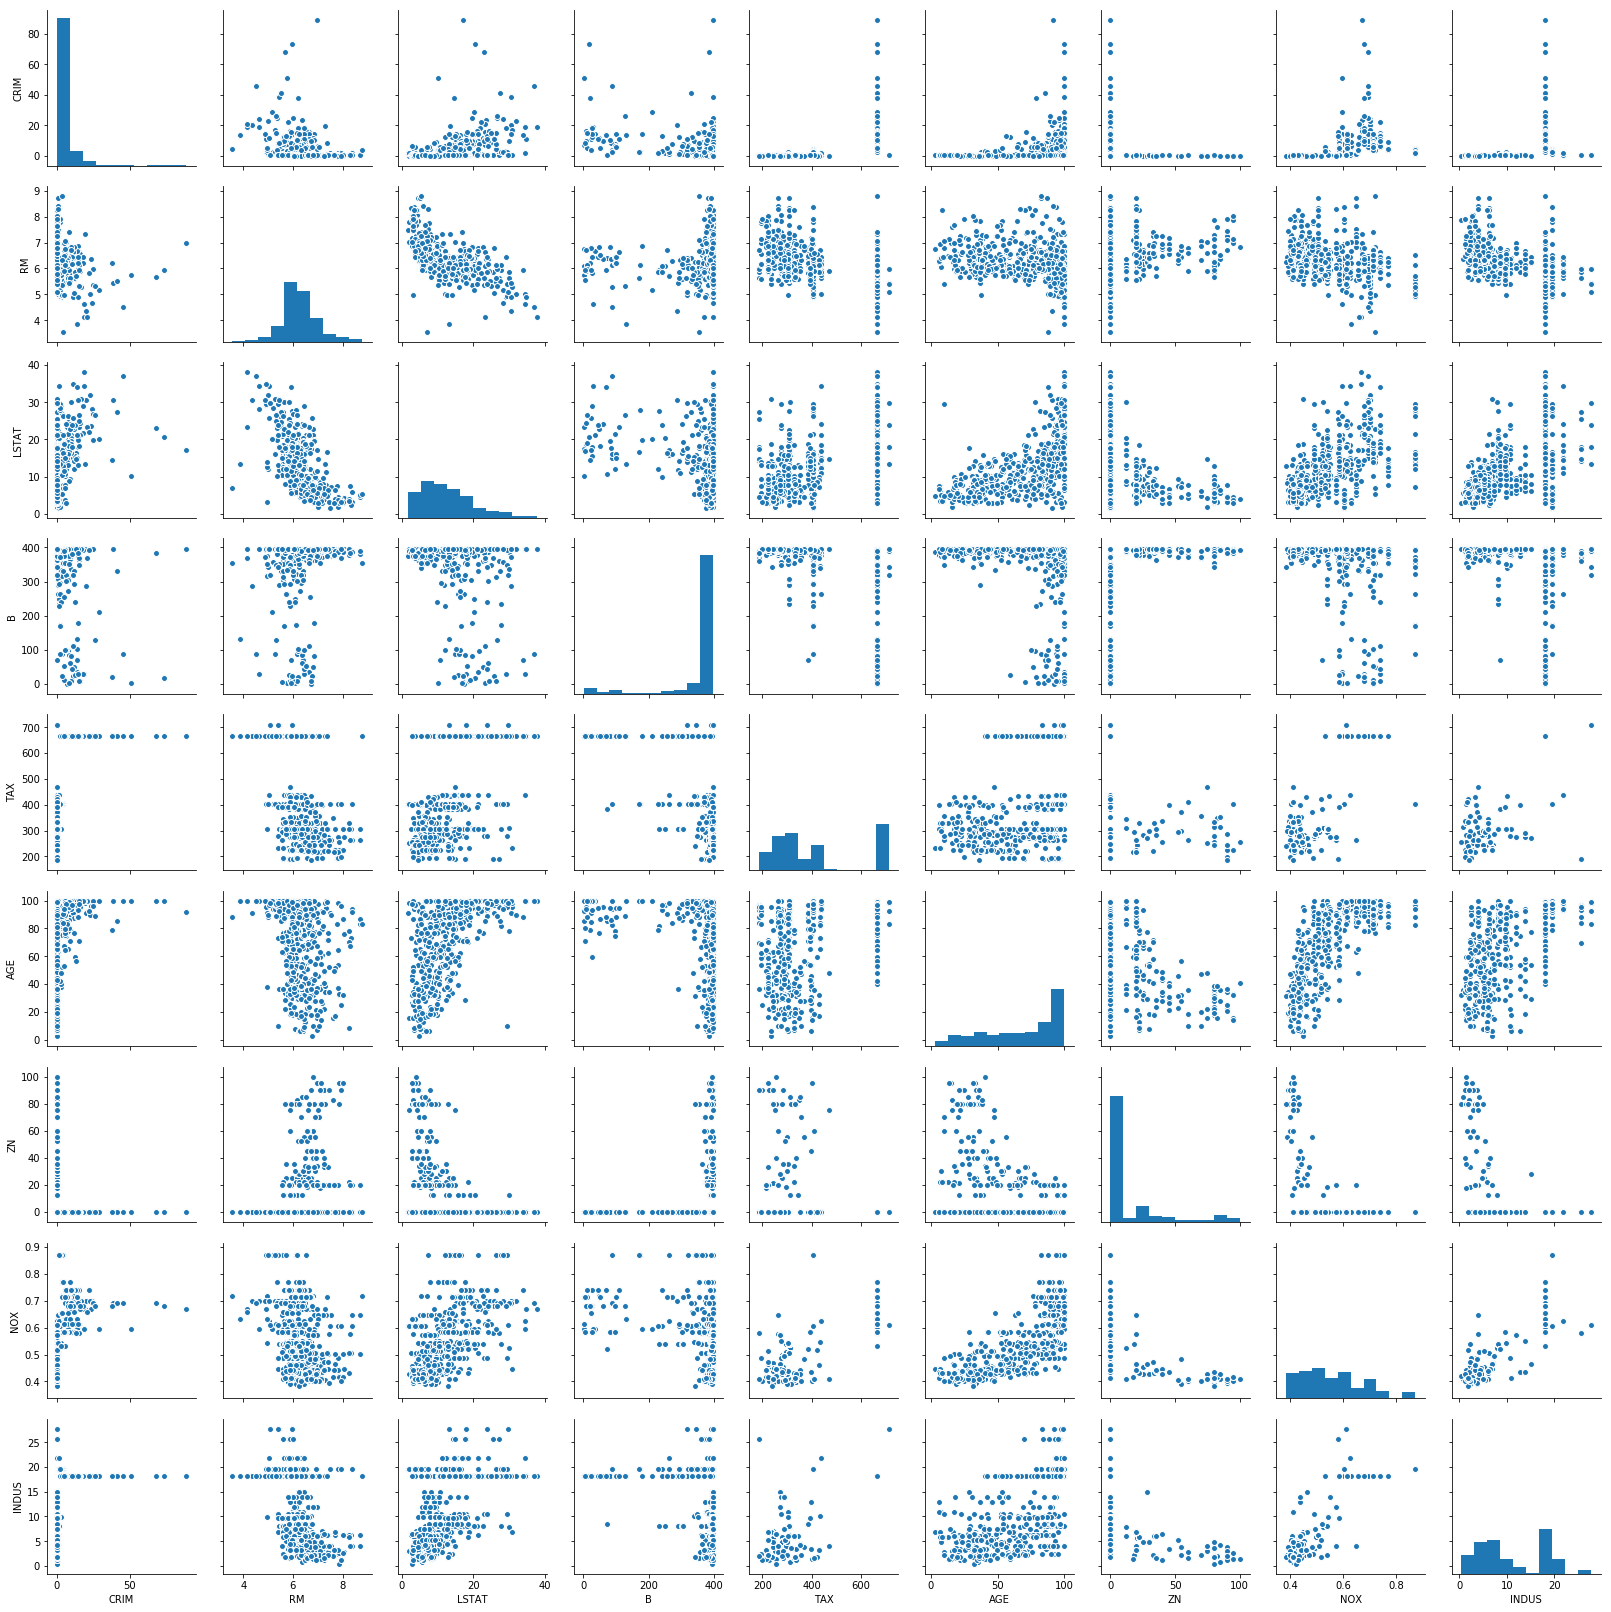

In [20]:
sns.pairplot(x_data2)
plt.show()

# VIF를 통한 다중공선성 확인


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [22]:
vif = pd.DataFrame()
x_data3= x_data2.drop('NOX',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [23]:
vif = pd.DataFrame()
x_data4= x_data3.drop('RM',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [24]:
x_data5 = sm.add_constant(x_data4, has_constant='add')
model_vif = sm.OLS(target,x_data5)
fitted_model_vif=model_vif.fit()

In [25]:
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           5.53e-89
Time:                        13:28:53   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 23 Aug 2019   Prob (F-statistic):          5.76e-111
Time:                        13:28:53   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 학습 / 검증데이터 분할

In [27]:
from sklearn.model_selection import train_test_split
X = x_data2_
y = target
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [28]:
test_y

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
132,23.0
292,27.9
31,14.5
218,21.5
90,22.6


In [29]:
train_x2 = sm.add_constant(train_x, has_constant='add')
fit_1 = sm.OLS(train_y,train_x)
fit_1=fit_1.fit()

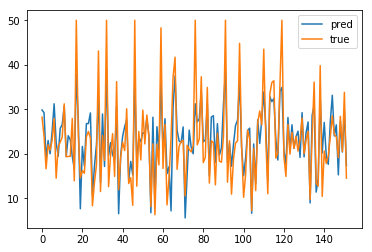

In [30]:
plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(test_y),label="true")
plt.legend()
plt.show()

In [55]:
X = x_data3
y = target
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

X = x_data4
y = target
train_x3, test_x3, train_y3, test_y3 = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(354, 8) (152, 8) (354, 1) (152, 1)
(354, 8) (152, 8) (354, 1) (152, 1)


In [56]:
test_y2

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
132,23.0
292,27.9
31,14.5
218,21.5
90,22.6


In [57]:
fit_2 = sm.OLS(train_y2,train_x2)
fit_2=fit_2.fit()
fit_3 = sm.OLS(train_y3,train_x3)
fit_3=fit_3.fit()

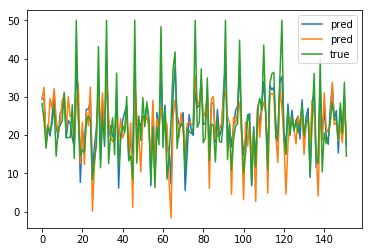

In [58]:
## true값과 예측값 비교 
plt.plot(np.array(fit_2.predict(test_x2)),label="pred")
plt.plot(np.array(fit_3.predict(test_x3)),label="pred")
plt.plot(np.array(test_y2),label="true")
plt.legend()
plt.show()

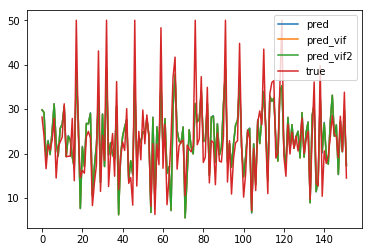

In [59]:
## full모델 추가해서 비교 
plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(fit_2.predict(test_x2)),label="pred_vif")
plt.plot(np.array(fit_2.predict(test_x2)),label="pred_vif2")
plt.plot(np.array(test_y2),label="true")
plt.legend()
plt.show()

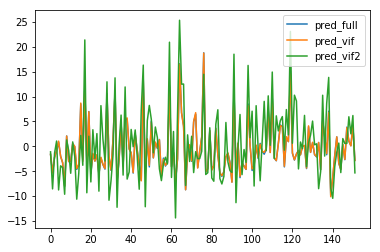

In [60]:
plt.plot(np.array(test_y2['Target']-fit_1.predict(test_x)),label="pred_full")
plt.plot(np.array(test_y2['Target']-fit_2.predict(test_x2)),label="pred_vif")
plt.plot(np.array(test_y2['Target']-fit_3.predict(test_x3)),label="pred_vif2")
plt.legend()
plt.show()

# MSE를 통한 검증데이터에 대한 성능비교

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
 mean_squared_error(y_true= test_y2['Target'], y_pred= fit_2.predict(test_x2))

25.594813292253487

In [63]:
 mean_squared_error(y_true= test_y2['Target'], y_pred= fit_3.predict(test_x3))

57.71900270631697

In [64]:
 mean_squared_error(y_true= test_y2['Target'], y_pred= fit_1.predict(test_x))

26.148631468819854